# Logistic Regression

## 1. Predicting a continuous response
- Using linear regression model

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
# glass.sort('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [3]:
len(glass)

214

In [4]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1}) # 1, 2, 3은 0으로, 5, 6, 7로 바꿔주는 Pandas 기능
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Text(0,0.5,'household')

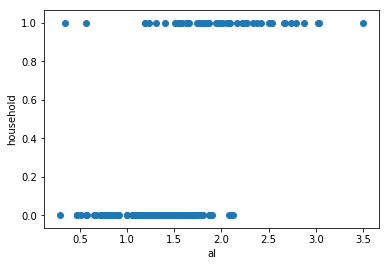

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [6]:
# fit a linear regression model and store the predictions
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0,0.5,'household')

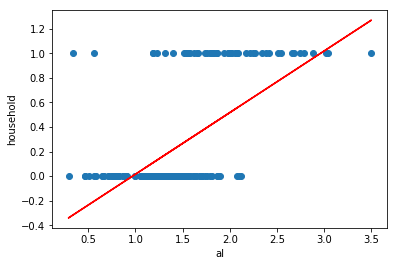

In [7]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

## 2. Predicting a categorical response
- Using logistic regression

In [8]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

In [9]:
glass.head(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0.135623,0


In [10]:
# First column: predicted probability of class 0
# Second column: predicted probability of class 1
print(logreg.predict_proba(X))

[[9.57512963e-01 4.24870368e-02]
 [8.83729869e-01 1.16270131e-01]
 [7.81727605e-01 2.18272395e-01]
 [9.10590269e-01 8.94097310e-02]
 [9.26210406e-01 7.37895944e-02]
 [7.19368281e-01 2.80631719e-01]
 [9.50165283e-01 4.98347166e-02]
 [9.65248419e-01 3.47515807e-02]
 [8.79365064e-01 1.20634936e-01]
 [8.83729869e-01 1.16270131e-01]
 [7.67126168e-01 2.32873832e-01]
 [9.17167650e-01 8.28323504e-02]
 [8.65415687e-01 1.34584313e-01]
 [9.17167650e-01 8.28323504e-02]
 [9.03545531e-01 9.64544686e-02]
 [9.29017074e-01 7.09829263e-02]
 [9.46053995e-01 5.39460046e-02]
 [9.81890179e-01 1.81098214e-02]
 [9.41624370e-01 5.83756296e-02]
 [6.56717894e-01 3.43282106e-01]
 [8.15293899e-01 1.84706101e-01]
 [9.98500716e-01 1.49928375e-03]
 [9.10590269e-01 8.94097310e-02]
 [8.87956869e-01 1.12043131e-01]
 [9.48148145e-01 5.18518549e-02]
 [9.34336646e-01 6.56633537e-02]
 [8.60471912e-01 1.39528088e-01]
 [8.96009117e-01 1.03990883e-01]
 [8.50128209e-01 1.49871791e-01]
 [9.13935859e-01 8.60641409e-02]
 [9.071278

In [11]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [12]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1,0,0.065459,0,0.042487
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,0,0.195765,0,0.116270
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,0,0.285976,0,0.218272
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,0,0.160682,0,0.089410
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,0,0.135623,0,0.073790
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,0,0.326071,0,0.280632
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1,0,0.085506,0,0.049835
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1,0,0.040400,0,0.034752
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1,0,0.200776,0,0.120635


Text(0,0.5,'household')

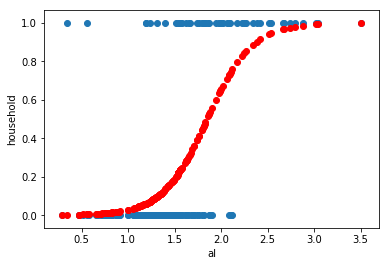

In [13]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.scatter(glass.al, glass.household_pred_prob, color='red')
# plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## 3. Iris data classification

In [14]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Standardizing the features:

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

Training a logistic regression model with scikit-learn

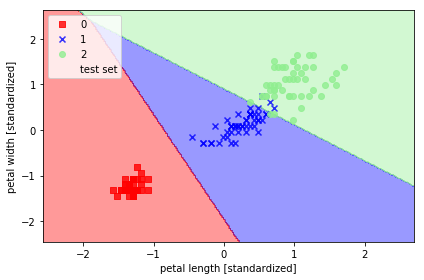

In [18]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

# 4. Classification with TItanic dataset
- Data from Kaggle's Titanic competition: [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

In [19]:
import pandas as pd
url = 'data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) # random_state = seed. 같은 샘플 추출.

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1000) # C : 1/alpha --> alpha가 커지면(=C가 작아지면) 제약이 강해짐. 
# 파라미터 중 n_Jobs : 학습 속도를 높일 수 있음. CPU 더 쓰는 것 같은 것. sklearn Googling.
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.8224241864081682), ('Parch', 0.27167984457549266)]


In [22]:
print(logreg.coef_) # List에 List가 또 붙어있음.
print(logreg.coef_[0]) # 하나 벗겨 줌.

[[-0.82242419  0.27167984]]
[-0.82242419  0.27167984]


In [23]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)

In [ ]:
y_pred_prob # 확률이 나오는데, 1, 0 결정의 raw data를 볼 수 있음

In [1]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class)) 

NameError: name 'y_test' is not defined

# 5. How to evaluate the classification model

## Using confusion matrix

In [25]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class)) # 배운 거랑 위치 다르니까 잘 확인할 것

[[114  25]
 [ 42  42]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [27]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 42
True Negatives: 114
False Positives: 25
False Negatives: 42


In [28]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.5


In [29]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.8201438848920863


In [ ]:
print(metrics.f1_score(y_test, y_pred_class))

In [30]:
print(metrics.classification_report(y_test, y_pred_class))
# support : 해당 class의 수

             precision    recall  f1-score   support

          0       0.73      0.82      0.77       139
          1       0.63      0.50      0.56        84

avg / total       0.69      0.70      0.69       223



### How about using other threshold?
- If y_pred_prob > 0.3, than y_pred_class = 1

In [31]:
test = logreg.predict_proba(X_test) # 확률을 뽑음(오른쪽이 살아남을 확률)
print(test)

[[0.70866641 0.29133359]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.38124844 0.61875156]
 [0.76144096 0.23855904]
 [0.58374631 0.41625369]
 [0.58374631 0.41625369]
 [0.58374631 0.41625369]
 [0.70866641 0.29133359]
 [0.51846071 0.48153929]
 [0.64958968 0.35041032]
 [0.76144096 0.23855904]
 [0.31953003 0.68046997]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.70866641 0.29133359]
 [0.38124844 0.61875156]
 [0.38124844 0.61875156]
 [0.51846071 0.48153929]
 [0.58374631 0.41625369]
 [0.64958968 0.35041032]
 [0.4488822  0.5511178 ]
 [0.58374631 0.41625369]
 [0.70866641 0.29133359]
 [0.70866641 0.29133359]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.38124844 0.61875156]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.64958968 0.35041032]
 [0.51661682 0.48338318]
 [0.58374631 0.41625369]
 [0.76144096 0.23855904]
 [0.51661682 0.48338318]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.76144096 0.23855904]
 [0.58374631 0.41625369]
 [0.38124844 0.61875156]


In [32]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1] # 두 번째 열(살아남을 확률)만 가져오겠음.

Text(0,0.5,'Frequency')

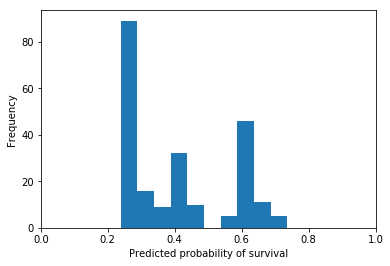

In [33]:
# histogram of predicted probabilities
%matplotlib inline
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [34]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0) # 0.3 이상이면 1, 아니면 0. np 문법.

In [35]:
y_pred_class_new

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [36]:
# old confusion matrix
print(confusion)

[[114  25]
 [ 42  42]]


In [37]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[84 55]
 [21 63]]


In [38]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [39]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.75


In [40]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.60431654676259


In [41]:
print(metrics.classification_report(y_test, y_pred_class_new))

             precision    recall  f1-score   support

          0       0.80      0.60      0.69       139
          1       0.53      0.75      0.62        84

avg / total       0.70      0.66      0.66       223



## ROC, auroc

### Drawing ROC curve and calculate AUC

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
classifier = LogisticRegression(penalty='l2', C=1)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [44]:
print(y_prob[0:5,:])

[[0.70491473 0.29508527]
 [0.75808298 0.24191702]
 [0.39390225 0.60609775]
 [0.39390225 0.60609775]
 [0.75808298 0.24191702]]


In [45]:
print(y_score[0:5]) # y_prob랑 y_score 중 어떤 걸 써도 상관 없음

[-0.87081249 -1.14219806  0.43093848  0.43093848 -1.14219806]


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_score) # , _ 로 변수를 하나 생략할 수 있음. 빼면 에러남.
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()